# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [2]:
# import the elements from app.py
from app import get_data_from_url, get_soup_from_html, get_n_table_from_soup, get_html_as_list, save_df_to_db, get_df_from_db

## Getting the data from the web

In [3]:
# get the data
data = ''
try: 
    data = get_data_from_url(resource_url='https://companies-market-cap-copy.vercel.app/index.html')
except:
    print('The data could not been retrieve.')


In [4]:
# transform the data to a Soup
soup = get_soup_from_html(data)
print(soup)


<!DOCTYPE html>

<html lang="en-US">
<head>
<title>Tesla (TSLA) - Revenue</title>
<meta charset="utf-8"/>
<link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="/img/icons/apple-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/img/ic

In [5]:
# get the first and second tables from the soup
table_0 = get_n_table_from_soup(soup, 0)
table_1 = get_n_table_from_soup(soup, 1)

In [6]:
print('First table')
print(table_0)


First table
<table class="table" style="width:100%">
<thead>
<tr>
<th>Year</th>
<th>Revenue</th>
<th>Change</th>
</tr>
</thead>
<tbody>
<tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr><tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr><tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr><tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr><tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr><tr><td><span class="year

In [7]:
print('Second table')
print(table_1)

Second table
<table class="table w-100"> <thead> <tr> <th>Company</th> <th>Revenue</th> <th>Revenue <span class="responsive-hidden">difference</span><span class="responsive-shown">diff.</span></th> <th>Country</th> </tr> </thead> <tbody><tr><td class="name-td"><a href="/apple/revenue/" style="pointer-events: none;"><div class="float-left pt-1"></div><div class="name-div"><div class="company-name">Apple</div><div class="company-code"><span class="rank d-none"></span>AAPL</div></div></a></td></tr></tbody></table>


We just need to work with the first table

In [8]:
# get the data frm the first table as a dict
data_as_dict = get_html_as_list(table_0)
print(data_as_dict)

[{'year': 2024, 'revenue': 97.15, 'change': 0.39}, {'year': 2023, 'revenue': 96.77, 'change': 18.8}, {'year': 2022, 'revenue': 81.46, 'change': 51.35}, {'year': 2021, 'revenue': 53.82, 'change': 70.67}, {'year': 2020, 'revenue': 31.53, 'change': 28.31}, {'year': 2019, 'revenue': 24.57, 'change': 14.52}, {'year': 2018, 'revenue': 21.46, 'change': 82.51}, {'year': 2017, 'revenue': 11.75, 'change': 67.98}, {'year': 2016, 'revenue': 7.0, 'change': 73.01}, {'year': 2015, 'revenue': 4.04, 'change': 26.5}, {'year': 2014, 'revenue': 3.19, 'change': 58.85}, {'year': 2013, 'revenue': 2.01, 'change': 387.23}, {'year': 2012, 'revenue': 0.41, 'change': 102.34}, {'year': 2011, 'revenue': 0.2, 'change': 74.95}, {'year': 2010, 'revenue': 0.11, 'change': 4.29}, {'year': 2009, 'revenue': 0.11, 'change': 0.0}]


## Data as dataframe

In [9]:
# transform the list to a DataFrame
df = pd.DataFrame(data_as_dict)
df

,year,revenue,change
0,2024,97.15,0.39
1,2023,96.77,18.80
2,2022,81.46,51.35
3,2021,53.82,70.67
4,2020,31.53,28.31
5,2019,24.57,14.52
6,2018,21.46,82.51
7,2017,11.75,67.98
8,2016,7.00,73.01
9,2015,4.04,26.50


## Save to DB

In [10]:
# set a database name
db_name = 'my_db'
table_name = 'annual_revenue'

In [11]:
# save the df to the database
save_df_to_db(df=df, db_name=db_name, table_name=table_name)

In [12]:
# get the dataframe to verify if it is ok
df_from_db = get_df_from_db(db_name=db_name, table_name=table_name)
df_from_db.head()

,year,revenue,change
0,2024,97.15,0.39
1,2023,96.77,18.80
2,2022,81.46,51.35
3,2021,53.82,70.67
4,2020,31.53,28.31


## Visualize the data

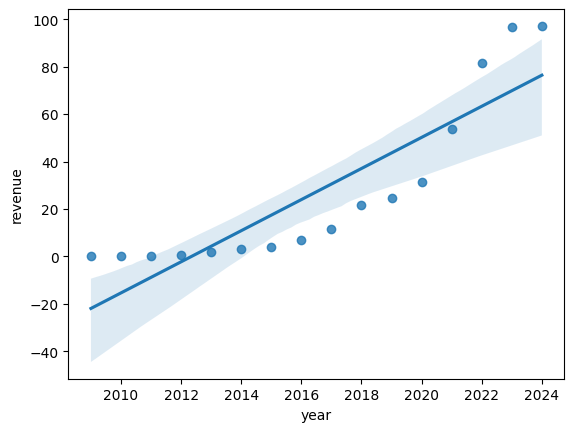

In [13]:
# graph with a linear regression year vs revenue
sns.regplot(x="year", y="revenue", data=df_from_db);

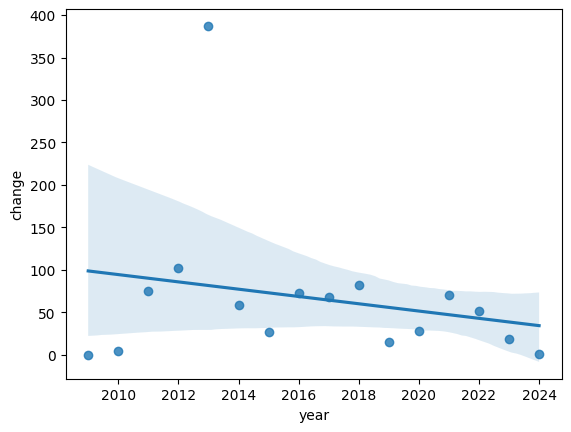

In [14]:
# graph with a linear regression year vs change
sns.regplot(x="year", y="change", data=df_from_db);

<Axes: xlabel='year', ylabel='revenue'>

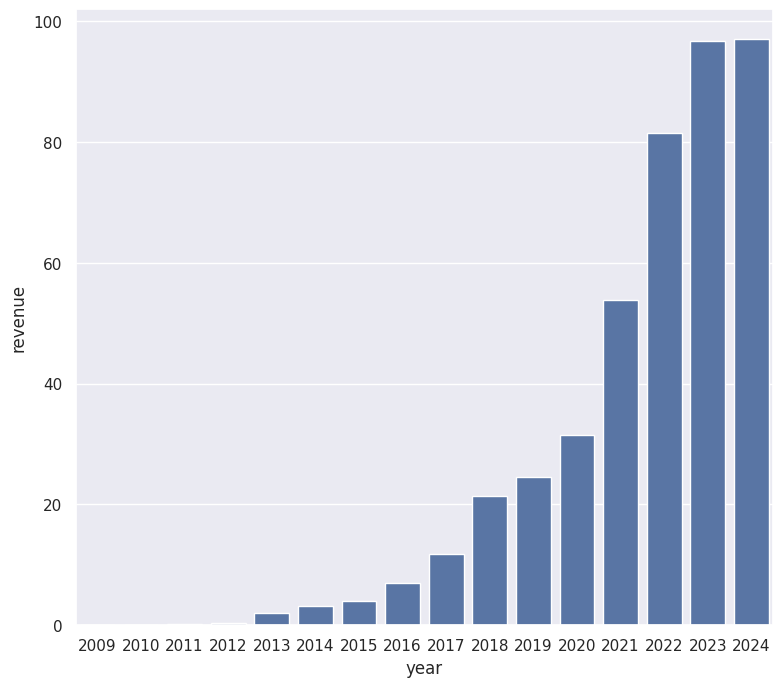

In [15]:
# revenue by year as bar char
sns.set_theme(rc={'figure.figsize':(9,8)})
sns.barplot(df_from_db, x="year", y="revenue")

<Axes: xlabel='year', ylabel='change'>

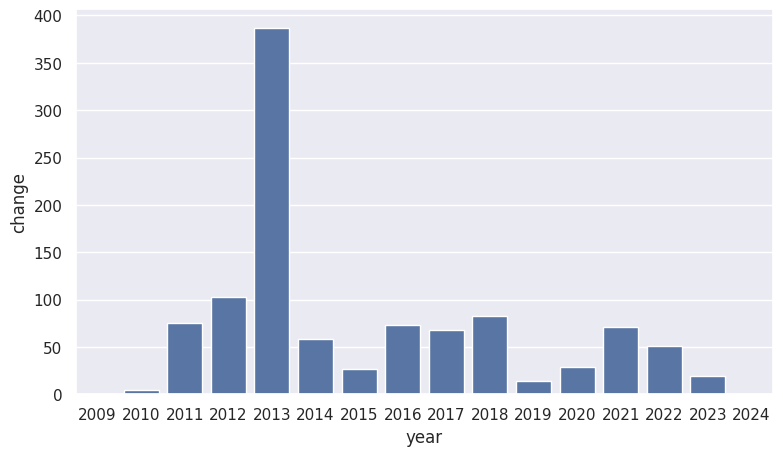

In [16]:
# change by year as bar char
sns.set_theme(rc={'figure.figsize':(9,5)})
sns.barplot(df_from_db, x="year", y="change")